# Projet Lay3rs - Mesh edition from NeRF

**Important info**: NeRF represents geometry using a volumetric density field (obtained by the ray marching passing through the pixels), which may not necessarily form a concrete surface. NeRF does not know that an object is opaque, or empty or flat. A NeRF model is not a mesh but it is a model that exists in 3D so we can mesh it. To address this, a popular strategy is to learn a SDF (signed distance function) where the surface can be determined by the zero level set. Actually SDF sets a function that tell you that inside an object its value is negative, at the surface of the object it is zero and outside it is positive. So with the SDF you can actually understand the concrete surface of an object. 

**interesting**:  NeRF completely discards the mesh-based representation and replaces it with a radiance-based model which
can effectively and efficiently encode view-dependent appearance, enabling it to reproduce scenes of complex geometry with high fidelity (Noguchi2021)

### Some definitions

- **Marching cubes**: Marching cubes is a computer graphics algorithm, published in the 1987 SIGGRAPH proceedings by Lorensen and Cline,[1] for extracting a polygonal mesh of an isosurface from a three-dimensional discrete scalar field (the elements of which are sometimes called voxels) (https://en.wikipedia.org/wiki/Marching_cubes)

- **Triangle mesh**: In computer graphics, a triangle mesh is a type of polygon mesh. It comprises a set of triangles (typically in three dimensions) that are connected by their common edges or vertices. (https://en.wikipedia.org/wiki/Triangle_mesh)

- **Baked/non-baked**: Baking is the process used to pre-compute texture and lighting information. The result is often used for real-time applications (such as for games) or for exporting models into other software packages with complex shading intact, or simply as a way to eliminate rendering overhead in elaborate scenes.

- **Novel view synthesis**:  the task of using captured images to recover a 3D representation that can be rendered from unobserved viewpoints — are largely based on Neural Radiance Fields (NeRF) [Mildenhall et al. 2020].

- **PSNR**: peak signal to noire ratio, the higher the better the Model image reconstructs the ground truth. Comparison pixel by pixel. https://www.ni.com/fr/shop/data-acquisition-and-control/add-ons-for-data-acquisition-and-control/what-is-vision-development-module/peak-signal-to-noise-ratio-as-an-image-quality-metric.html

- **SSIM**: structural similarity index measure quantifies the similarities between two images by evaluating their similar structure. The higher the value the similar the two images are. https://en.wikipedia.org/wiki/Structural_similarity

- **LPIPS** essentially computes the similarity between the activations of two image patches for some pre-defined network. This measure has been shown to match human perception well. A low LPIPS score means that image patches are perceptual similar. https://torchmetrics.readthedocs.io/en/stable/image/learned_perceptual_image_patch_similarity.html

- **Rasterization**: is the task of taking an image described in a vector graphics format (shapes) and converting it into a raster image (a series of pixels, dots or lines, which, when displayed together, create the image which was represented via shapes).https://en.wikipedia.org/wiki/Rasterisation

- **Inteference**: Machine learning (ML) inference involves applying a machine learning model to a dataset and generating an output or “prediction”. This output might be a numerical score, a string of text, an image, or any other structured or unstructured data. https://www.run.ai/guides/machine-learning-inference/understanding-machine-learning-inference

- **SDF**: Signed distance functions, or SDFs for short, when passed the coordinates of a point in space, return the shortest distance between that point and some surface. The sign of the return value indicates whether the point is inside that surface or outside (hence signed distance function). (https://jamie-wong.com/2016/07/15/ray-marching-signed-distance-functions/)

- **Implicit neural representations**: is about parameterizing a continuous differentiable signal with a neural network. The signal is encoded within the neural network, providing a possibly more compact representation or allowing smooth parameter-based manipulation of that signal. This is a type of regression problem. (https://hugocisneros.com/notes/implicit_neural_representations/)

- **Instant NGP**: is a NeRF platform created by NVIDIA Labs from the paper Instant Neural Graphics Primitives with a Multiresolution Hash Encoding. (https://neuralradiancefields.io/instant-ngp/)

- **Knowledge distillation** : helps overcome these challenges by capturing and “distilling” the knowledge in a complex machine learning model or an ensemble of models into a smaller single model that is much easier to deploy without significant loss in performance. (https://neptune.ai/blog/knowledge-distillation)

Uselful links:
    
- https://neuralradiancefields.io/

## Outils NeRFs

- https://github.com/kakaobrain/nerf-factory

- https://docs.nerf.studio/en/latest/index.html

## Extracting meshes

Some interesting comment on the capacities of NeRF: Extracting meshes from a NeRF model using a **marching cube** algorithm results in poor quality meshing. This is because the densities are noisy and discontinous. Indeed, the depth obtained by the NeRF is not per se a good real representation of the density. NeRF does not know that the object is actually opaque and dense or thick, it only has the pixels and density but it does not actually know what the object is. (https://www.youtube.com/watch?v=HfJpQCBTqZs)

Therefore, that are other ways to be able to extract meshes. Here is a summary (with code) of the CEA *NeRF - State of the Art - Section 3.4*


réunion 06/09/23: 

- installer mini-conda sur PC bureau - commencer a tourner les modeles
- lancer des calculs sur A100 pour comparer les temps d'optimization (entre A100 et RTX4090)
- ajouter les codes à la partie method (comprendre quelle étape est quelle partie du code)
- comprendre les differences entre les techniques utilisées dans papier d'édition mesh
- method de computer graphics (marching cubes, SDF, triangulation)
- deux papiers google: differences et similarités
- baidu: quel technique 
- nouveaux articles dans edition de meshes??
- 

lancer des tests sur les nerfs baselines, lancer le meme modele sur colab et sur RTX bureau:
- nerf vanila (done, check tiny_nerf.ipynb sur Colab for notes A100 vs RTX4090 Nerf_TF2)
- mip NeRF 360
- zip nerf

https://arxiv.org/pdf/2305.19590.pdf
https://arxiv.org/pdf/2111.13674.pdf 
https://dl.acm.org/doi/pdf/10.1145/3550454.3555457
les deux papiers NDIVIA papier sur les kernels (lié au positional encoding), pas prioritaire mais il vaut comprendre si ça nous apporte quelque chose ou pas, surtout sié au marching cubes

Rasmoussen2006 - weight-space view + function-space view

positional encoding c'est une méthode kernel, ça ne optimize pas de parametres mais une function sinus


- tester ces codes:

https://github.com/nv-tlabs/NKSR - kernel methods

https://github.com/huangjh-pub/neural-galerkin - based on this one + learnable kernels



- regarder aussi ce papier:
https://nv-tlabs.github.io/fegr/assets/fegr_paper.pdf - autre methode de NVIDIA, different de 


- 3D gaussian splatting (gaussian processus sur murphy)

- murphy 319 - read!!!!

### BakedSDF (Yariv2023, 16 May 2023)

mip-NeRF + SDF. results are really good for most scenes however thin and semitransparent objects are poorly reconstructed.

https://bakedsdf.github.io/

#### Introduction

- Mip-NeRF 360 (Barron 2022): rendering is very slow (30 seconds to render one single frame on a RTX3090)
- Instant-NGP (Muller 2022): rendering very slow (5 FPS) due to the limitation of volumetric ray marching
- Mobile NeRF (Chen 2022): they baked the NeRF into a polygon surface representation. This NeRF can render novel views at 50 FPS, which is better. The problem is that the polygon representation is good for novel view synthesis but it is not suited for appearence editing, relighting or simulation

#### Summary

**BakedSDF** comes as a solution to this issues as it turns the NeRF like volumetric representation which they triangulate into a high quality mesh. Also supports real time rendering on commodity devices at 60+ FPS. BakedSDF equips the extracted mesh with an efficient appearance model that decomposes appearence into diffuse and specular colors (https://www.youtube.com/watch?v=fThKXZ6uDTk). The appearence model is based on spherical Gaussians. 

for some demo of their work: https://bakedsdf.github.io/viewer/index.html?scene=https://storage.googleapis.com/realtime-nerf-360/bakedsdf/gardenvase.glb


- They combine the benifts of mip-NeRF 360 [Barron2022] (using a variant of this model) for representing unbounded scenes with the well-nehaved surface properties of VolSDF's hybrid volume-surface representation [Yariv2021].

`VolSDF models volumetric density of the scene as a parametric function of an MLP-parameterized signed distance function (SDF) 𝑓
that returns the signed distance 𝑓 (x) from each point x ∈ R3 to
the surface.`

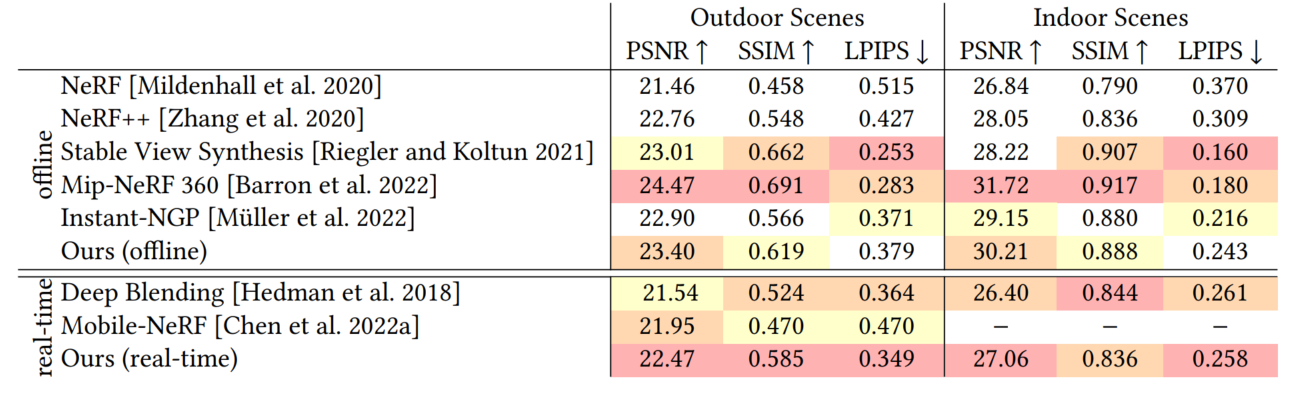


What they call **real-time**: image editing with the baked mesh. **offline** original SDF model optimization.

Some important comparison: *we evaluate our method’s rendering performance by comparing against Instant-NGP (the fastest “offline” model we evaluate against) and MobileNeRF (the real-time model that produces the highest quality renderings after our own). We measure performance of all methods at 1920 × 1080. Both MobileNeRF and our method are running in-browser on a 16" Macbook Pro with a Radeon 5500M GPU while Instant NGP is running on a workstation equipped with a power NVIDIA RTX 3090 GPU. Though our approach requires more on-disk storage than MobileNeRF (1.27×) and Instant NGP (4.07×), we see that our model is significantly more efficient than both baselines — our model yields FPS/Watt metrics that are 1.44× and 77× greater respectively, in addition to producing higher quality renderings.*

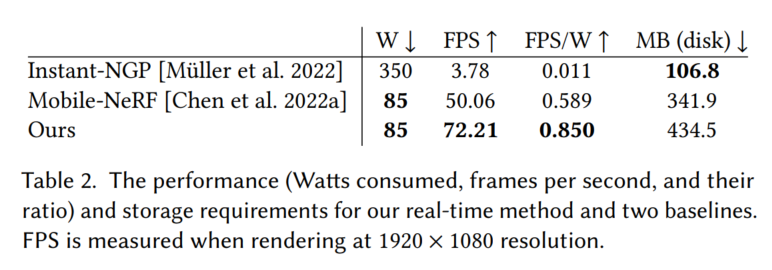

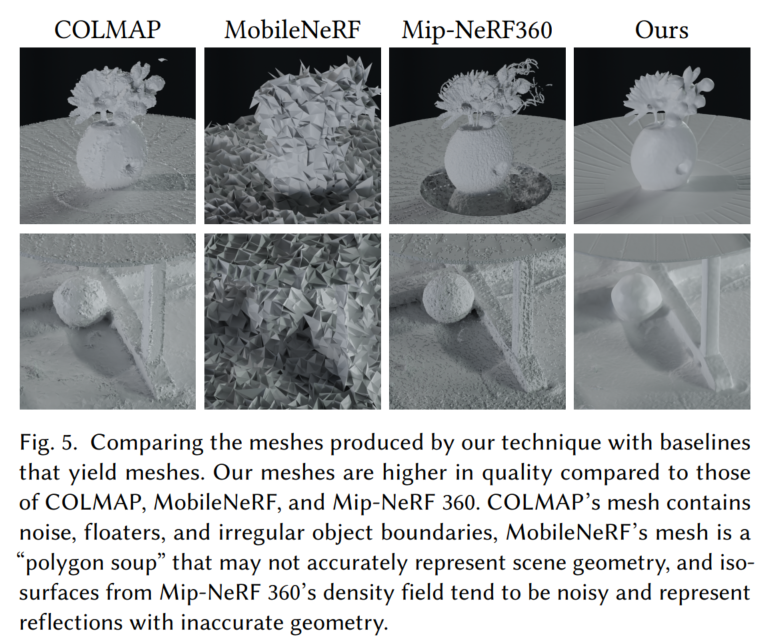

**Drawbacks**: 
1) Does not represent well thin or (semi)transparent objects due to the neural SDF representation: the scene is represented as a fully opaque mesh
2) High storage space needed: ~430 MB per scene

#### Implementation

- some discussion and commom problems (how to use BakedSDF in SDFStudio): https://github.com/autonomousvision/sdfstudio/issues/50
- BakedSDF is implemented in SDFStudio: https://github.com/autonomousvision/sdfstudio
- SDFStudio is build on NerfStudio: https://github.com/nerfstudio-project/nerfstudio

**Advantates** of both *Studios*: multiple model inside the same framework, easier to bounce between one Model to another :)

Models in NerfStudio:
- Nerfacto: Recommended method, integrates mutiple methods into one.

- Instant-NGP: Instant Neural Graphics Primitives with a Multiresolution Hash Encoding

- NeRF: OG Neural Radiance Fields

- Mip-NeRF: A Multiscale Representation for Anti-Aliasing Neural Radiance Fields

- TensoRF: Tensorial Radiance Fields


Model in SDFStudio:
`More specifically, SDF Studio builds on UniSurf, VolSDF, and NeuS. The main difference of these methods is in how the points along the ray are sampled and how the SDF is used during volume rendering.` 

### NerfMeshing (Rakotosaona2023, 16 Mar 2023)

NeRF + Signed Surface Approximation network (SDF as well). They distill the trained NERF into the SSAN model. 

no code available :(

From paper:  Introducing a novel signed surface approximation network (SSAN), we train a post-processing NeRF pipeline, defining the underlying surface and appearance. Essentially, SSAN estimates a Truncated Signed Distance Field (TSDF) and a feature appearance field. Harnessing the NeRF approximated geometry as well as the used training views, we distill the trained NeRF into the SSAN model. We then extract the 3D mesh from the trained SSAN which can be rendered on embedded devices at high frame-rate using rasterization and the appearance network. Thanks to the flexibility of our method, we can generate these 3D meshes fast
[14], are not tied to object-centric scenes [1], and can even model complex and non-lambertian surfaces [21].

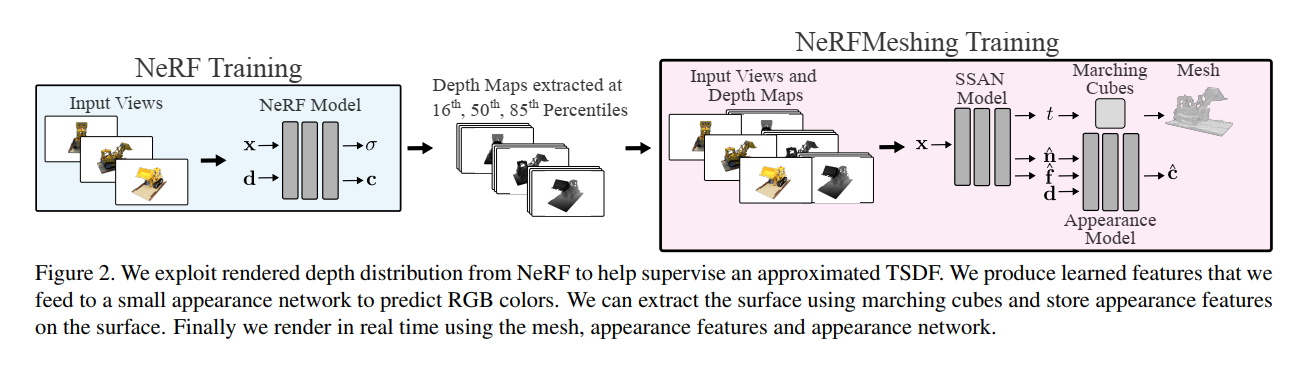

### Nerf2Mesh (Tang2023, 19 Aug 2023)

NeRF + marching cubes + nvdiffrast (perform differentiable rendering for appearence refinement).
results are not so define, too smoothed out or pixeled.

https://me.kiui.moe/nerf2mesh/

#### Introduction

It is interesting because the **BakedSDF** uses exatcly the SDF model with Marching cubes, but in **Nerf2Mesh** they say: *To obtain accurate surface meshes, a popular approach is to use Signed Distance Fields (SDF), which defines an exact surface [48, 53, 57]. However, this line of research typically generates over-smoothed geometry that fails to model thin structures.  Additionally, meshes obtained through Marching Cubes [29] produce a large number of redundant vertices and faces to keep details.* 

Basically, in **Nerf2Mesh** they point out that SDF and Marching cubes have limitations. Here they refine a coarse mesh extracted from NeRF for joint optimization of geometry and appearance. 

#### Summary

From paper: *novel framework that generates textured surface meshes from images. Our approach begins by efficiently initializing the geometry and view-dependency decomposed appearance with a NeRF. Subsequently, a coarse mesh is extracted, and an iterative surface refinement algorithm is developed to adaptively adjust both vertex positions and face density based on reprojected rendering errors. We jointly refine the appearance with geometry and bake it into texture images for realtime rendering.*

They decompose the appearence into view-independent diffuse and view-dependent specular terms to allow texture editing. The specular term is eported as a feature texture that produces view-dependent color though a small MLP embedded in the fragment shader. 

#### Implementation:

Code available! https://github.com/ashawkey/nerf2mesh

## Editing the NeRF

### Control-NeRF (Lazova2022, 22 Apr 2022)

no code available :( (they may release under research purposes)

volumetric representation (content + radiance at each point) + single neural rendering function (that generalizes across scenes). good quality results. object editing well done.

#### Summary

The problem with NeRF based approaches is that the scene is memorized within the neural network, which makes compositing of scenes and editing hard. The authors decouple the rendering network from the neural scene representation. We learn a latent representation of the scene, encoded as a spatially disentangled feature volume (i.e., in which the point features describe the content and radiance at that point in the scene), coupled with a neural rendering function that computes the radiance and density conditioned on the point feature. This decoupled model results in several advantages. We decouple geometry/appearance
from rendering by learning dense feature volume as representation for every scene and a single rendering model that
generalizes across scenes. 

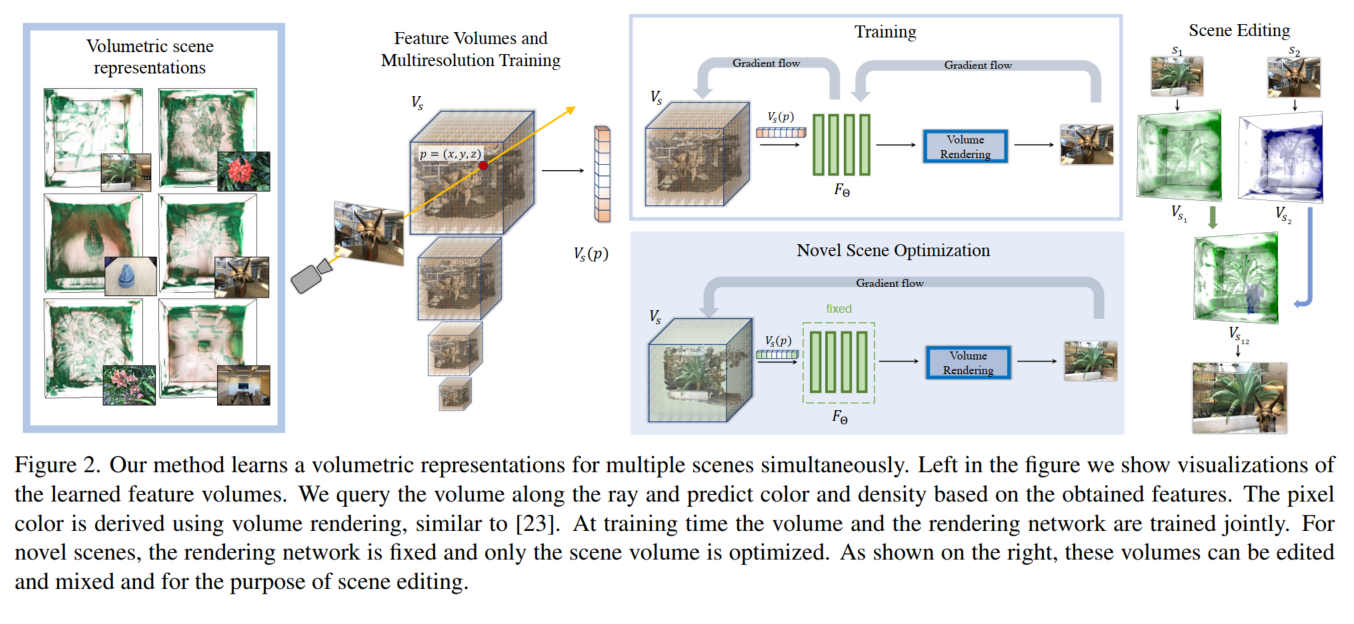

### Object-NeRF

Uses 2D masks to define obtjects. Decouples the scene into object (mask) and scene geometry. Results on edges not great.

#### Summary

1) First uses a editable neural scene rendering system given a collection of posed images and 2D instance masks, which supports high-quality novel view rendering as well as object manipulation.

2) Second, uses a novel two-pathway architecture, in which the scene branch encodes the scene geometry and appearance, and the object branch encodes each standalone object conditioned on learnable object activation codes. Each object has to be rendered with sharp boundaries without background bleeding.

#### Introduction

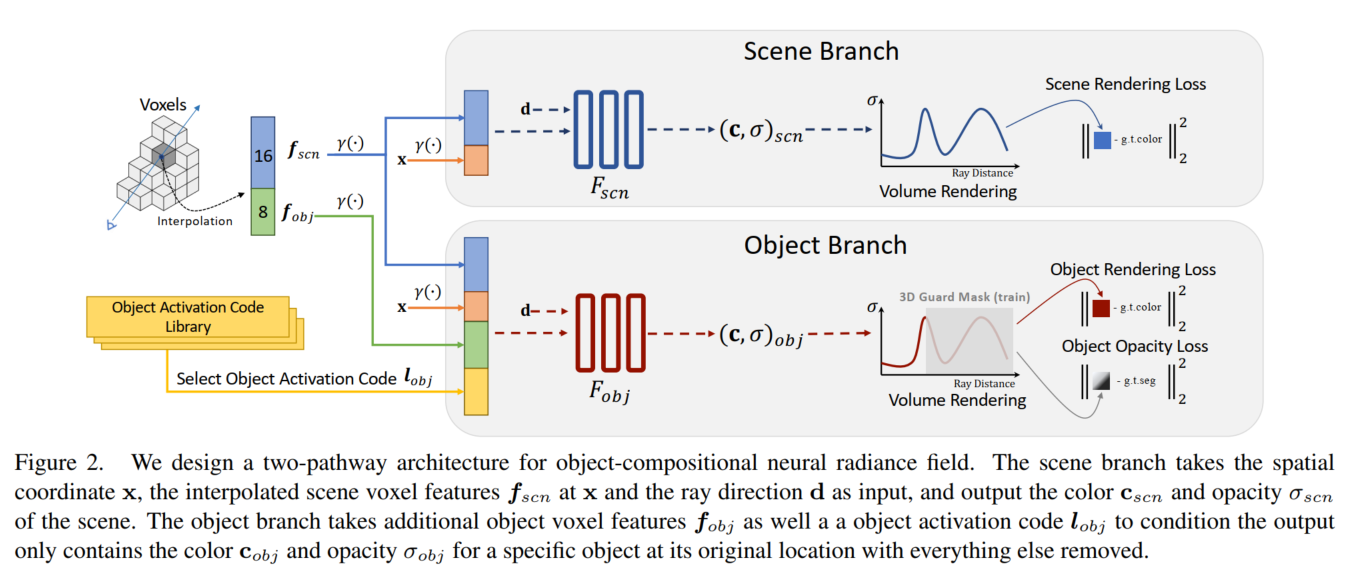

#### Implementation

Code available at: https://github.com/zju3dv/object_nerf

#### Conclusion

- Does not define the edges and shades so well
- Many tests on synthetic images/pre treated images from ScanNet (https://kaldir.vc.in.tum.de/scannet_browse/scans/scannet/grouped)
- Needs 2D masks to work and identifies the objects (not convinient for us!?)

### Removing Objects NeRF (Weder2022, 22 Dec 2022)
Image inpainting (filling missing regions) + uses 2D masks. results are okish, not so great (shading problems).

#### Summary

From article:
1) We propose the first approach focusing on inpainting NeRFs by leveraging the power of single image inpainting. 

2) A novel view-selection mechanism that automatically removes inconsistent views from the optimization. 

3) We present a new dataset for evaluating object removal and inpainting in indoor and outdoor scenes

#### Introduction

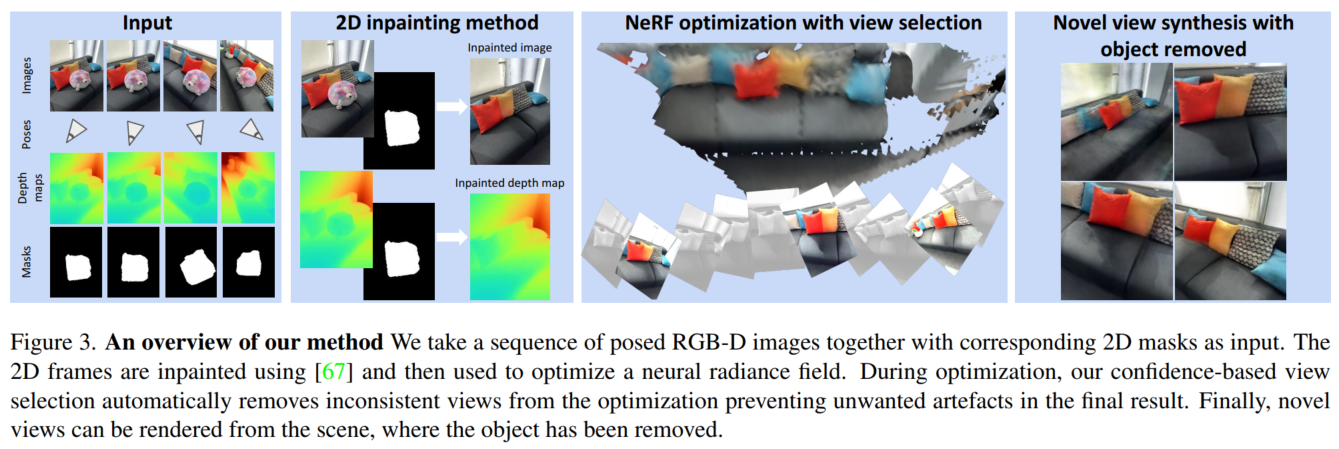

#### Implementation

Code available here: https://github.com/nianticlabs/nerf-object-removal

- needs Nvidia GPU (CUDA and cudNN) - ok
- dataset for testing available
- trained model available
- notebook for visualization available (https://github.com/nianticlabs/nerf-object-removal/blob/main/notebooks/vis_experiment.ipynb)

### NeRFShop (Jambon2023, May2023)

cage volumetric representation with vortex to select object, allowing changing of position and deformation. NeRF is retrained using distillation, artifacts are corrected using a membrane (Poisson solver). Built on instant-NGP.

good results for deformation and moving the objects but not sure if light and colors are possible to be edit.

#### Summary

Allows to select and deform objects through case-based transformations within pretrained NeRFs. They use a distillation process to allow correction of the deformed object. Artifacts are corrected using a memebrane-based interpolation approach inspired by Poisson Image Editing. 

About the cage: it is a volumetric region represented as voxels. They use the occupancy grids of Instant-NPG* to accelerate and reduce the number of aggregated samples along the ray via empty space skipping.

Selecting the object: The scribbles are then reprojected from screen-space to the underlying volume by ray-marching, using a process akin to Eq. 1. Raymarching continues until the accumulated transmittance drops below a user-defined threshold, which we set to 10−3 in all our experiments except for floater removal where we set it to 0.8. We apply a post-processing step using MeshFix [Attene et al. 2013] to avoid holes, selfintersections, and degenerate elements. 

Volume editing: We employ a two-level interpolation scheme, as illustrated in Fig. 5. The first level is the MVCbased interpolation done in a pre-processing step. The second level is an online barycentric interpolation inside the tetrahedron. 

Artifacts correction: 
1) Membrane correction: Our preliminary approach approximates the costly Poisson solver with a color correction membrane using Mean Value Coordinates, which fits well with our tetrahedral MVC interpolation scheme, allowing efficient computation. We proceed in three steps: The first two steps precompute necessary quantities from the cage and vertices of its tetrahedral mesh, respectively, while the third step uses these quantities during interactive rendering. Specifically, we consider densities 𝜎 and view-dependent colors c, where the latter is baked into low-order spherical harmonics (SH), avoiding NeRF network evaluations during interactive rendering.

2) NeRF distillation: we propose a NeRF distillation approach that “collapses” all edits performed by the user into the default hashgrid format of Instant-NGP. To achieve this, we re-train the scene, but additionally consider the user-provided edits to forward-map samples during optimization (Fig. 7). Importantly, this process enables us to perform distillation based on the original input images. 

Software interface:  We use Dear ImGui to create interactive panes, tabs and gizmos for intuitive 3D manipulation. Auxiliary visual elements (wireframes, grids) are added through OpenGL for our custom selection methods.


*Instant Neural Graphics Primitives with a Multiresolution Hash Encoding: The core idea behind the improved sampling technique is that sampling over empty space should be skipped and sampling behind high density areas should also be skipped. This is achieved by maintaining a set of multiscale occupancy grids which coarsely mark empty and non-empty space. https://docs.nerf.studio/en/latest/nerfology/methods/instant_ngp.html

#### Implementation

Very explained and well supported code available here: https://github.com/graphdeco-inria/nerfshop

- runs on RTX 2000 or RTX 3000 & 4000 (binary available, they did on a RTX 3090) - ok
- needs CUDA


**interesting FAQ:**

Q: Does this codebase run on Google Colab?

A: Yes. See this example (https://colab.research.google.com/drive/10TgQ4gyVejlHiinrmm5XOvQQmgVziK3i?usp=sharing) by user @myagues. Caveat: this codebase requires large amounts of GPU RAM and might not fit on your assigned GPU. It will also run slower on older GPUs.

Q: Can this codebase use multiple GPUs at the same time?

A: No. To select a specific GPU to run on, use the CUDA_VISIBLE_DEVICES environment variable. To optimize the compilation for that specific GPU use the TCNN_CUDA_ARCHITECTURES environment variable.


**From paper:**

`The (fixed) inference workload is distributed according to the number of active rays to maintain uniform GPU occupancy. A key component of Instant-NGP is a trainable sparse occupancy grid that is queried directly from the CUDA kernels performing SIMT (Single Instruction, Multiple Threads) operations. Thus, memory coherency and minimal throughput must be enforced across ray compactions. To do so, it uses fast CUDA (micro-)kernels, maximizing memory coherency. Our solution can easily be integrated with this procedure without disrupting the original design, by introducing intermediate kernel routines that remap samples according to user-defined edits before inference.`

### NARF (Neural Articulated Radiance Field, Noguchi2021)

#### Summary

From paper: we aim to learn a representation for rendering novel views and poses of 3D articulated objects, such as human bodies, from images. we propose a method that predicts the radiance field at a 3D location based on only the most relevant articulated part. This part is identified using a set of sub-networks that output the probability for each part given the 3D location and the 3D geometric configuration of the parts. The spatial configurations of parts are computed explicitly with a kinematic model, rather than modeled implicitly in the network. A NARF then predicts the density and view-dependent radiance of the 3D location conditioned on the properties of only the selected part. Our goal is to extend the representation capacity of
NeRF from static scenes to deformable articulated objects whose configurations can be described by a kinematic model.

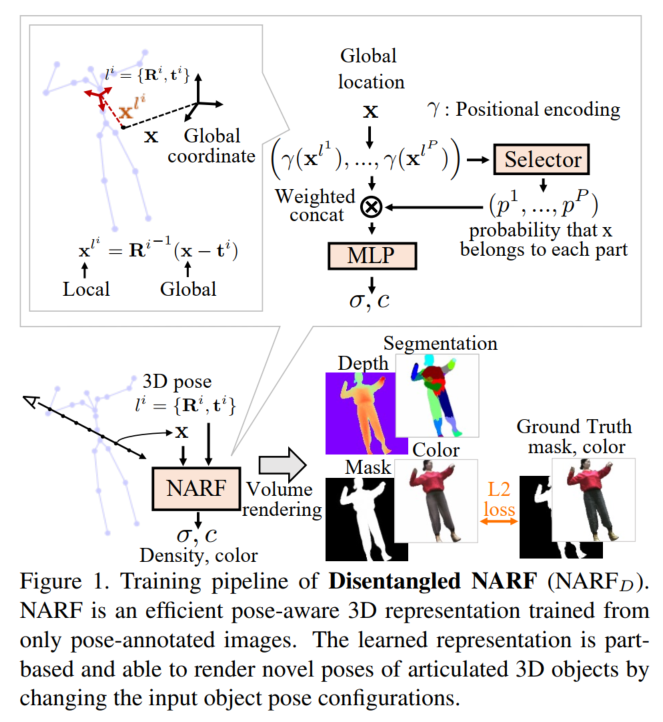

#### Implementation

Code available here: https://github.com/nogu-atsu/NARF

- may need multiple GPUs

### NeRV: Neural Reflectance and Visibility Fields for Relighting and View Synthesis (Srinivasan2021)

no code available: (

same idea as NeRF but uses instead of ray marching they use a neural visibility field. 

#### Summary

Our method represents the scene as a continuous volumetric function parameterized as MLPs whose inputs are a 3D location and whose outputs are the following scene properties at that input location: volume density, surface normal, material parameters, distance to the first surface intersection in any direction, and visibility of the external environment in any direction. The authors replace ray marching with a neural visibility field to allow complex ilumination. They simply query this visibility MLP to estimate visibility and expected termination depth in any direction 

**Interesting:**  Volume rendering is trivially differentiable, so the parameters of a NeRF can be optimized for a single scene by using gradient descent to minimize the difference between renderings of the NeRF and a set of observed images. 

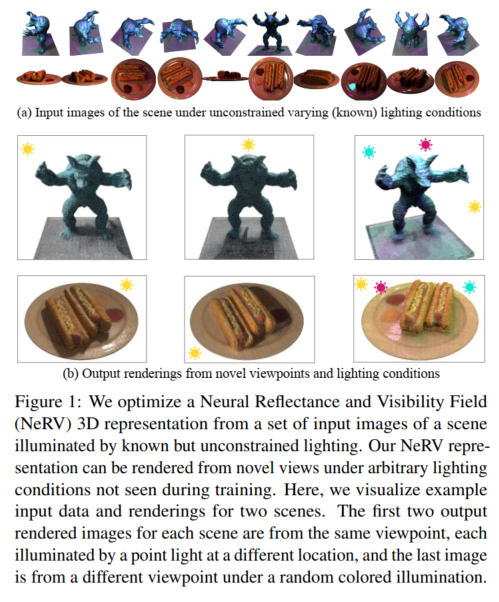

#### Implementation

no code available: (

`The shape and reflectance MLPs each use 8 fully-connected ReLU layers with 256 channels. The visibility MLP uses 8
fully-connected ReLU layers with 256 channels each to map the encoded 3D coordinates x to an 8-dimensional feature
vector which is concatenated with the encoded 3D direction vector ω and processed by 4 fully-connected ReLU layers
with 128 channels each.`

### NeRF for Outdoor Scene Relighting (Rudnev2022)

It is a NeRF + a new equation for rendering illumination and addition of a shadowing model to the NeRF.

https://arxiv.org/abs/2112.05140

https://4dqv.mpi-inf.mpg.de/NeRF-OSR/

#### Summary

Allows simultaneous editing of illumination and camera viewpoint using only a collection of outdoor photos shot in uncontrolled settings. Moreover, it enables direct control over the scene illumination, as defined through a spherical harmonics model. For evaluation, we collect a new benchmark dataset of several outdoor sites photographed from multiple viewpoints and at different times1. For each time, a 360◦ environment map is captured together with a colour-calibration chequerboard to allow accurate numerical evaluations on real data against ground truth. 

The authors add relightening and reshadowing:
1) To allow relighting: we introduce an explicit 2nd-order Spherical Harmonics (SH) illumination model [2] and redefine the rendering equation
2) To allow reshadowing: The shadow model is defined with a scalar computed by an MLP 

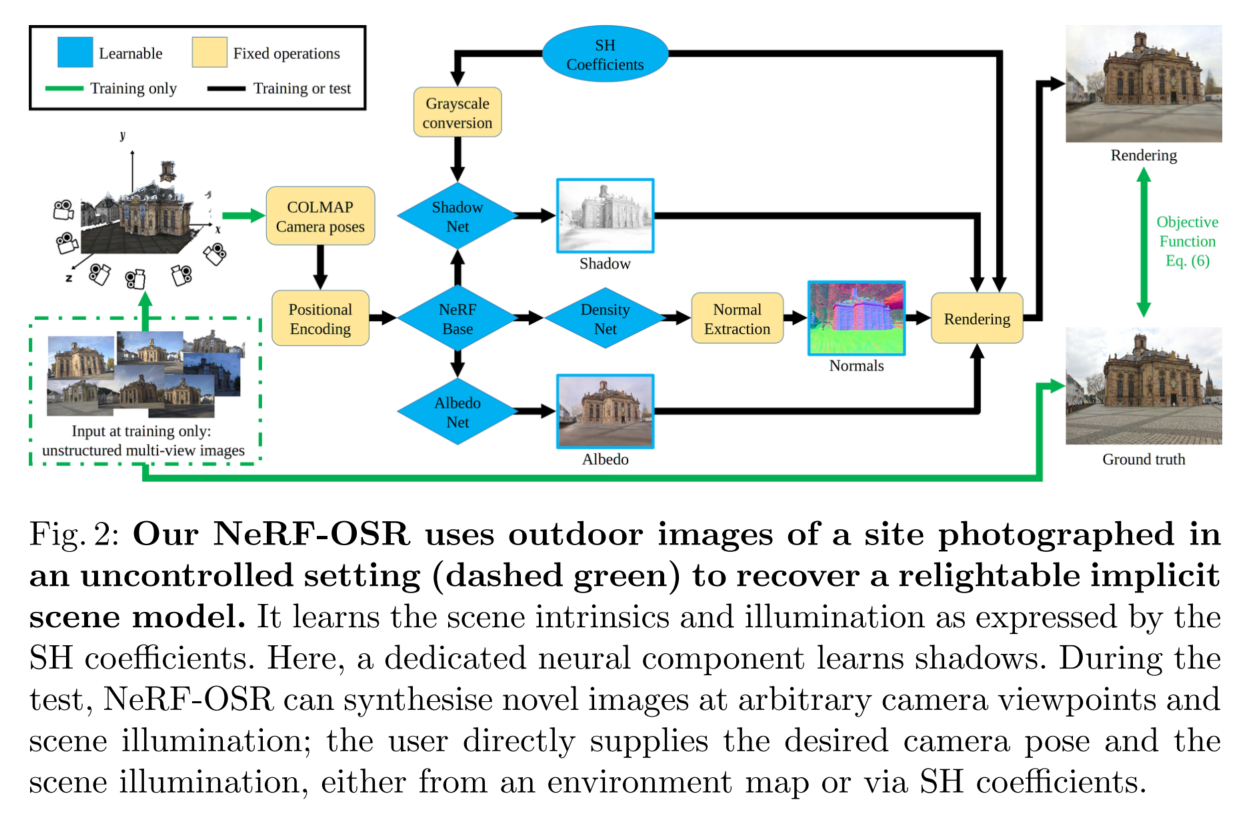

#### Implementation

Well supported code available here: https://github.com/r00tman/NeRF-OSR

### 

#### Summary

#### Introduction

#### Implementation

### 

#### Summary

#### Introduction

#### Implementation

### 

#### Summary

#### Introduction

#### Implementation